<a href="https://colab.research.google.com/github/Relo02/Artificial-neural-networks-and-deep-learning-/blob/main/Penguin_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

# Data Loading
os.environ["DATASET_NAME"] = "penguins.csv"
os.environ["DATASET_URL"] = "1qn1P6_KW08wGRfSkTlzBoDCyVb18T3Lk"
if not os.path.exists(os.environ["DATASET_NAME"]):
    print("Downloading data...")
    ! gdown -q ${DATASET_URL}
    print("Download completed")
else:
    print("Data already downloaded. Using cached data...")
dataset = pd.read_csv('penguins.csv')

Download completed


In [2]:
if not dataset.empty:
  print(dataset)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

In [3]:
# Set seed for reproducibility
SEED = 42

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch
torch.manual_seed(SEED)
from torch import nn
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import TensorDataset, DataLoader
logs_dir = "tensorboard"
!pkill -f tensorboard
%load_ext tensorboard

# switching into cuda gpu for parallelization
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

PyTorch version: 2.8.0+cu126
Device: cpu


In [4]:
# other libraries

# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

In [5]:
# create a pandas dataFrame
feature_names = dataset.columns.tolist()
penguin_dataset = pd.DataFrame(dataset, columns=feature_names)
penguin_dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
# Print the shape of the Penguin dataset
print('Penguin dataset shape', penguin_dataset.shape)

# Generate summary statistics for the Penguin dataset
penguin_dataset.describe()

Penguin dataset shape (344, 7)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## **Preprocessing of the dataset**

In [7]:
# Eliminating NaN data
penguin_dataset.dropna(inplace=True)
penguin_dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
# Print the shape of the Penguin dataset
print('Penguin dataset shape', penguin_dataset.shape)

# Generate summary statistics for the Penguin dataset
penguin_dataset.describe()

Penguin dataset shape (333, 7)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
# Extract all the lables from the dataframe
target = penguin_dataset['species']
print("Target lables shape: ", target.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
for label, num_samples in zip(unique, count):
    print(f'Class {label} has {num_samples} samples')

Target lables shape:  (333,)
Target labels: ['Adelie' 'Chinstrap' 'Gentoo']
Class Adelie has 146 samples
Class Chinstrap has 68 samples
Class Gentoo has 119 samples


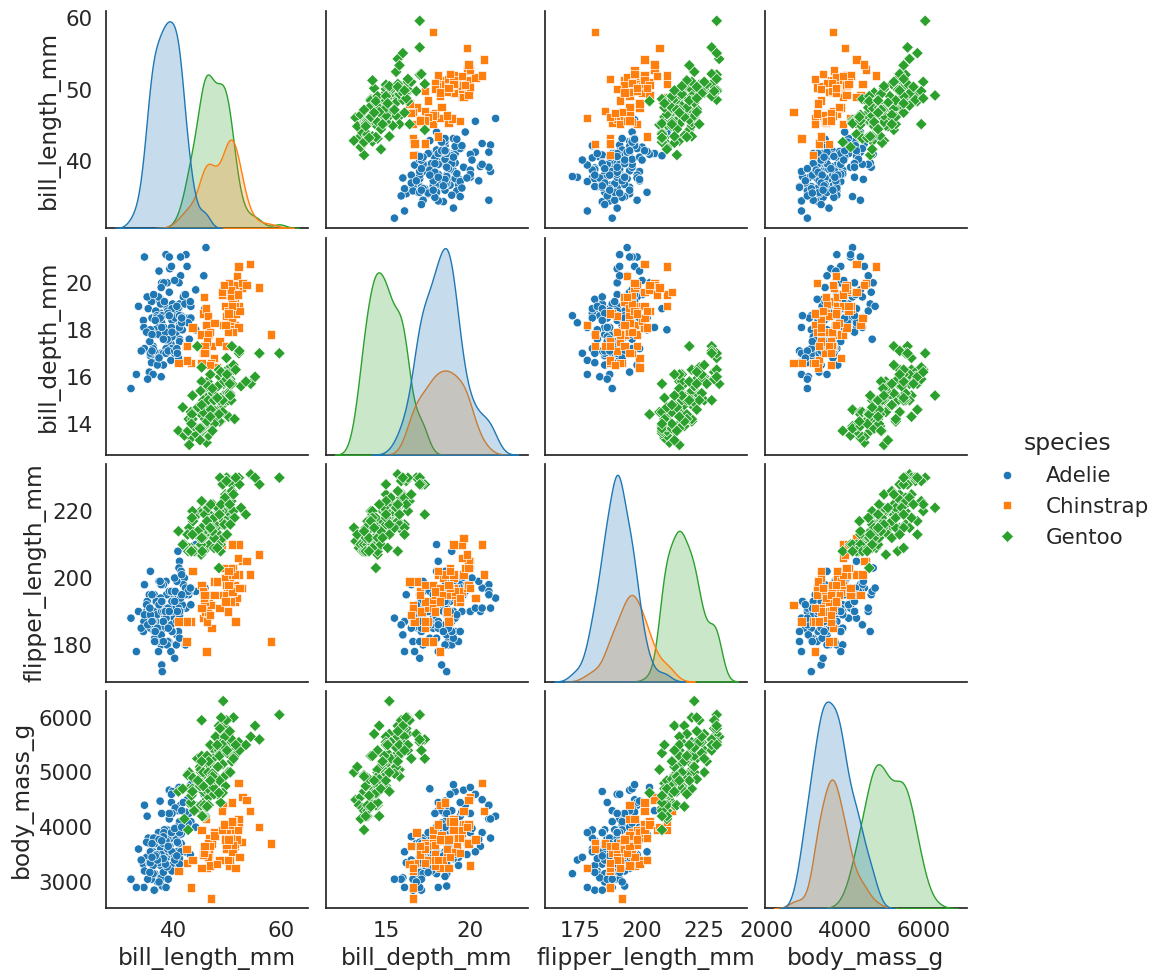

In [10]:
# Copy the penguin dataset
plot_dataset = penguin_dataset.copy()

# Assign target labels to the dataset
plot_dataset["species"] = target

# Plot using seaborn pairplot
sns.pairplot(plot_dataset, hue="species", palette="tab10", markers=["o", "s", "D"])
plt.show()

# Clean up by deleting the temporary dataset
del plot_dataset

In [11]:
# Determine the number of features
input_features = penguin_dataset.shape[1]
print(f'Number of input features: {input_features}')

# Determine the number of classes
num_classes = len(np.unique(target))
print(f'Number of classes: {num_classes}')

Number of input features: 7
Number of classes: 3


In [12]:
from sklearn.preprocessing import LabelEncoder

# Prepare features and labels as float32 and int64 arrays
X = penguin_dataset.drop(['species', 'island', 'sex'], axis=1).values.astype(np.float32)

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target).astype(np.int64)

# First split: separate 20 samples for final testing
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=20,
    random_state=SEED,
    stratify=y
)

# Second split: divide remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=20,
    random_state=SEED,
    stratify=y_train_val
)

# Show final dataset sizes
print('Training set shape:\t', X_train.shape, y_train.shape)
print('Validation set shape:\t', X_val.shape, y_val.shape)
print('Test set shape:\t\t', X_test.shape, y_test.shape)

Training set shape:	 (293, 4) (293,)
Validation set shape:	 (20, 4) (20,)
Test set shape:		 (20, 4) (20,)


In [13]:
# Find maximum value for each feature in training data
max_df = X_train.max(axis=0)
print('Penguin dataset maximum values')
print(max_df)

# Find minimum value for each feature in training data
min_df = X_train.min(axis=0)
print('\nPenguin dataset minimum values')
print(min_df)

Penguin dataset maximum values
[  59.6   21.2  231.  6300. ]

Penguin dataset minimum values
[  32.1   13.1  172.  2700. ]


In [14]:
# Apply min-max scaling using training data statistics
X_train = (X_train - min_df) / (max_df - min_df)
X_val = (X_val - min_df) / (max_df - min_df)
X_test = (X_test - min_df) / (max_df - min_df)

# Verify normalization worked (should be 0.0 to 1.0)
print(f"New maximum values: {X_train.max(axis=0)}")
print(f"New minimum values: {X_train.min(axis=0)}")

New maximum values: [1. 1. 1. 1.]
New minimum values: [0. 0. 0. 0.]


In [15]:
# Convert numpy arrays to PyTorch datasets (pairs features with labels)
train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

In [16]:
# Define the batch size, which is the number of samples in each batch
BATCH_SIZE = 16

In [17]:
def make_loader(ds, batch_size, shuffle, drop_last):
    # Determine optimal number of worker processes for data loading
    cpu_cores = os.cpu_count() or 2
    num_workers = max(2, min(4, cpu_cores))

    # Create DataLoader with performance optimizations
    return DataLoader(
        ds,                     # loaded TensorDataset
        batch_size=batch_size,
        shuffle=shuffle,        # boolean value indicating whether to shaffle the dataat the beginning of each epoch
        drop_last=drop_last,
        num_workers=num_workers,
        pin_memory=True,  # Faster GPU transfer
        pin_memory_device="cuda" if torch.cuda.is_available() else "",
        prefetch_factor=4,  # Load 4 batches ahead
    )

In [18]:
# Create data loaders with different settings for each phase
train_loader = make_loader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader   = make_loader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
test_loader  = make_loader(test_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

In [19]:
# Get one batch from the training data loader
for xb, yb in train_loader:
    print("Features batch shape:", xb.shape)
    print("Labels batch shape:", yb.shape)
    break # Stop after getting one batch

Features batch shape: torch.Size([16, 4])
Labels batch shape: torch.Size([16])


## Model